# LMDZOR-STD-NY07-CUSTOM-200

conda env: new `phd_v3` (in `envs/phd`)

## LMDZOR-STD-REF

```fortran
! LMDZOR-STD-REF
frac_snow_veg(:) = tanh(snowdepth(:)/(0.025*(snowrho_ave(:)/50.)))
```
https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Niu2007.ipynb

- Jean-Zay WORK: `/gpfsdswork/projects/rech/goe/ufz23bm/SCA_parameterization/modipsl/config/LMDZOR_v6/LMDZOR-STD-REF`
- Jean-Zay STORE: `/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF`
- THREDDS: `/gpfsdsmnt/ipsl/dods/pub/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/`
- CICLAD: `/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/` 
- https://vesg.ipsl.upmc.fr/thredds/catalog/idris_work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/catalog.html


## LMDZOR-STD-NY07-CUSTOM-200

```fortran
! LMDZOR-STD-NY07-CUSTOM-200
frac_snow_veg(:) = tanh(snowdepth(:)/(0.025*(snowrho_ave(:)*(1+zstd_not_filtered(:)/200.)/50.)))
```
https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Niu2007-std.ipynb

- Jean-Zay WORK: `/gpfswork/rech/goe/ufz23bm/SCA_parameterization/modipsl/config/LMDZOR_v6/LMDZOR-STD-NY07-CUSTOM-200`
- Jean-Zay STORE: `/gpfsscratch/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200`
- THREDDS: `/gpfsdsmnt/ipsl/dods/pub/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200/`
- CICLAD: `/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200T/` 
- https://vesg.ipsl.upmc.fr/thredds/catalog/idris_work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200/catalog.html

## Import modules

In [8]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


In [9]:
xr.__version__

'0.16.0'

## Define paths

In [10]:
root = '/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/'
exp_ref = 'LMDZOR-STD-REF'
exp_new = 'LMDZOR-STD-NY07-CUSTOM-200'

In [11]:
!ls /thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/ATM/Analyse/TS_MO/

LMDZOR-STD-REF_19800101_19891230_1M_ave_t2m_daily_max.nc
LMDZOR-STD-REF_19800101_19891230_1M_ave_t2m_daily_min.nc
LMDZOR-STD-REF_19800101_19891230_1M_bils.nc
LMDZOR-STD-REF_19800101_19891230_1M_CFC11_ppt.nc
LMDZOR-STD-REF_19800101_19891230_1M_CFC12_ppt.nc
LMDZOR-STD-REF_19800101_19891230_1M_CH4_ppb.nc
LMDZOR-STD-REF_19800101_19891230_1M_cldh.nc
LMDZOR-STD-REF_19800101_19891230_1M_cldl.nc
LMDZOR-STD-REF_19800101_19891230_1M_cldm.nc
LMDZOR-STD-REF_19800101_19891230_1M_cldq.nc
LMDZOR-STD-REF_19800101_19891230_1M_cldt.nc
LMDZOR-STD-REF_19800101_19891230_1M_co2_ppm.nc
LMDZOR-STD-REF_19800101_19891230_1M_colO3_strat.nc
LMDZOR-STD-REF_19800101_19891230_1M_colO3_trop.nc
LMDZOR-STD-REF_19800101_19891230_1M_concbc.nc
LMDZOR-STD-REF_19800101_19891230_1M_concdust.nc
LMDZOR-STD-REF_19800101_19891230_1M_concoa.nc
LMDZOR-STD-REF_19800101_19891230_1M_concso4.nc
LMDZOR-STD-REF_19800101_19891230_1M_concss.nc
LMDZOR-STD-REF_19800101_19891230_1M_ec550aer.nc
LMDZOR-STD-REF_19800101_19891230_1M_evap.nc
LMDZ

## Plot differences and compare to observation


#############
### Variable: frac_snow 
#############
        
Open reference simulation:
/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/SRF/Analyse/TS_MO/LMDZOR-STD-REF_19800101_19891230_1M_frac_snow.nc

Open new simulation:
/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200/SRF/Analyse/TS_MO/LMDZOR-STD-NY07-CUSTOM-200_19800101_19891230_1M_frac_snow.nc

Get observation: NH_SCE_CDR
/data/mlalande/RUTGERS/nhsce_v01r01_19661004_20191202.nc



/data/mlalande/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/data/mlalande/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Reuse existing file: bilinear_88x88_143x144.nc


/data/mlalande/miniconda3/envs/phd_v3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)



#############
### Variable: t2m 
#############
        
Open reference simulation:
/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/ATM/Analyse/TS_MO/LMDZOR-STD-REF_19800101_19891230_1M_t2m.nc

Open new simulation:
/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200/ATM/Analyse/TS_MO/LMDZOR-STD-NY07-CUSTOM-200_19800101_19891230_1M_t2m.nc

Get observation: CRU_TS
/data/mlalande/CRU/tmp/cru_ts4.04.1901.2019.tmp.dat.nc

Reuse existing file: bilinear_360x720_143x144_peri.nc

#############
### Variable: precip 
#############
        
Open reference simulation:
/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/ATM/Analyse/TS_MO/LMDZOR-STD-REF_19800101_19891230_1M_precip.nc

Open new simulation:
/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200/ATM/Analyse/TS_MO/LMDZOR-STD-NY07-CUSTOM-200_19800101_19891230_1M_precip.nc

Get observation: APHRO_MA
/data/mlalande/APHRODITE/APHRO_MA_050deg_V1101.*.

/data/mlalande/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


Reuse existing file: bilinear_140x180_143x144.nc


/data/mlalande/miniconda3/envs/phd_v3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/data/mlalande/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


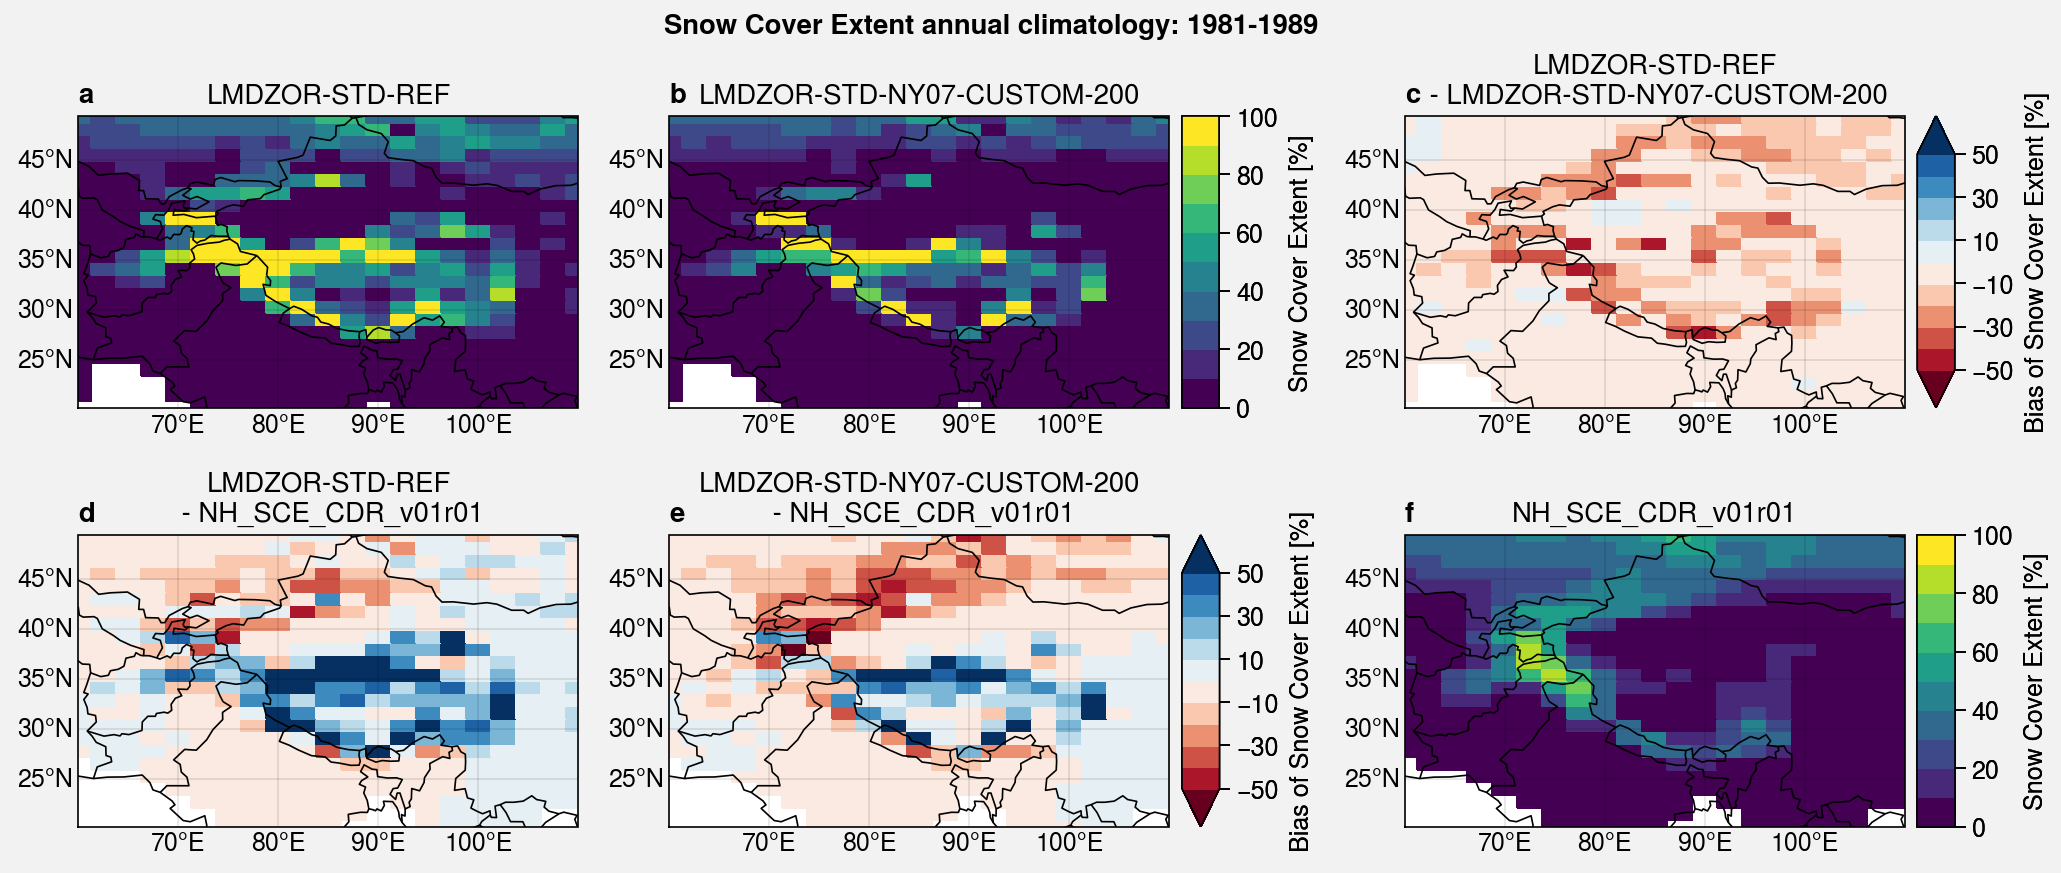

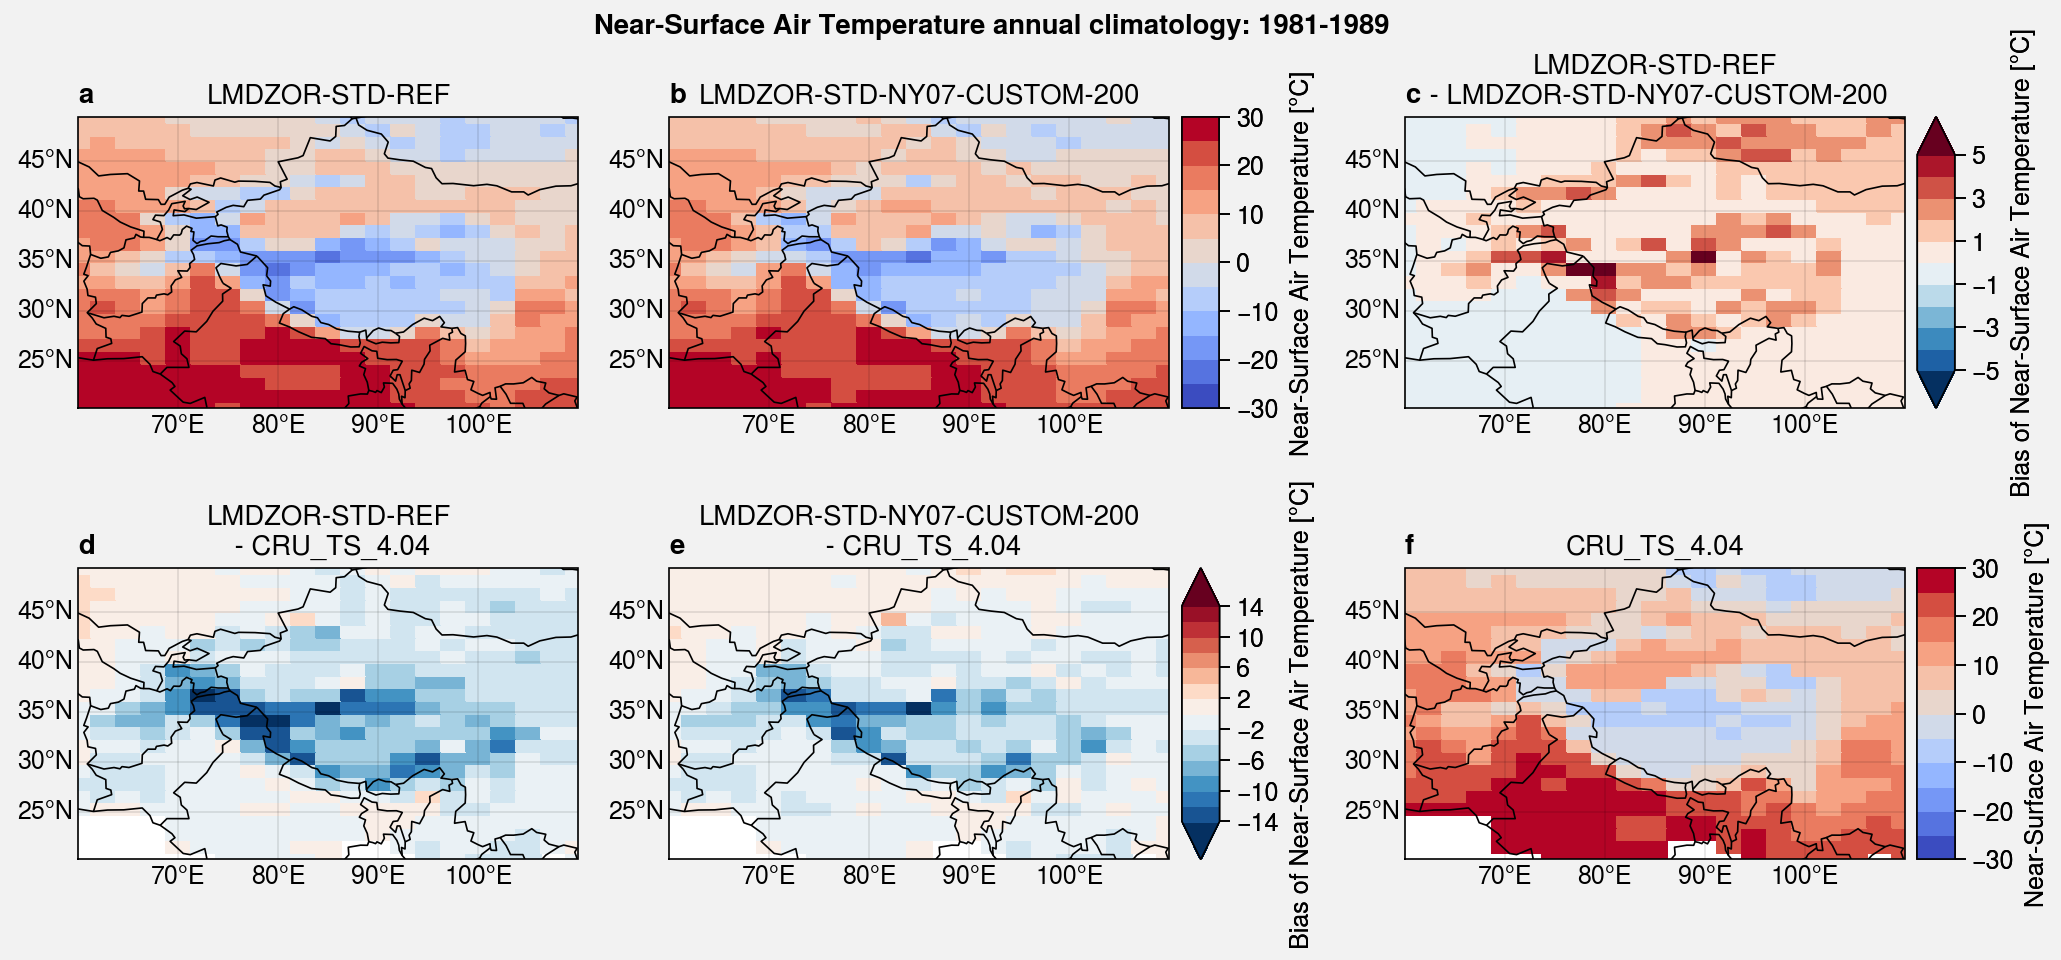

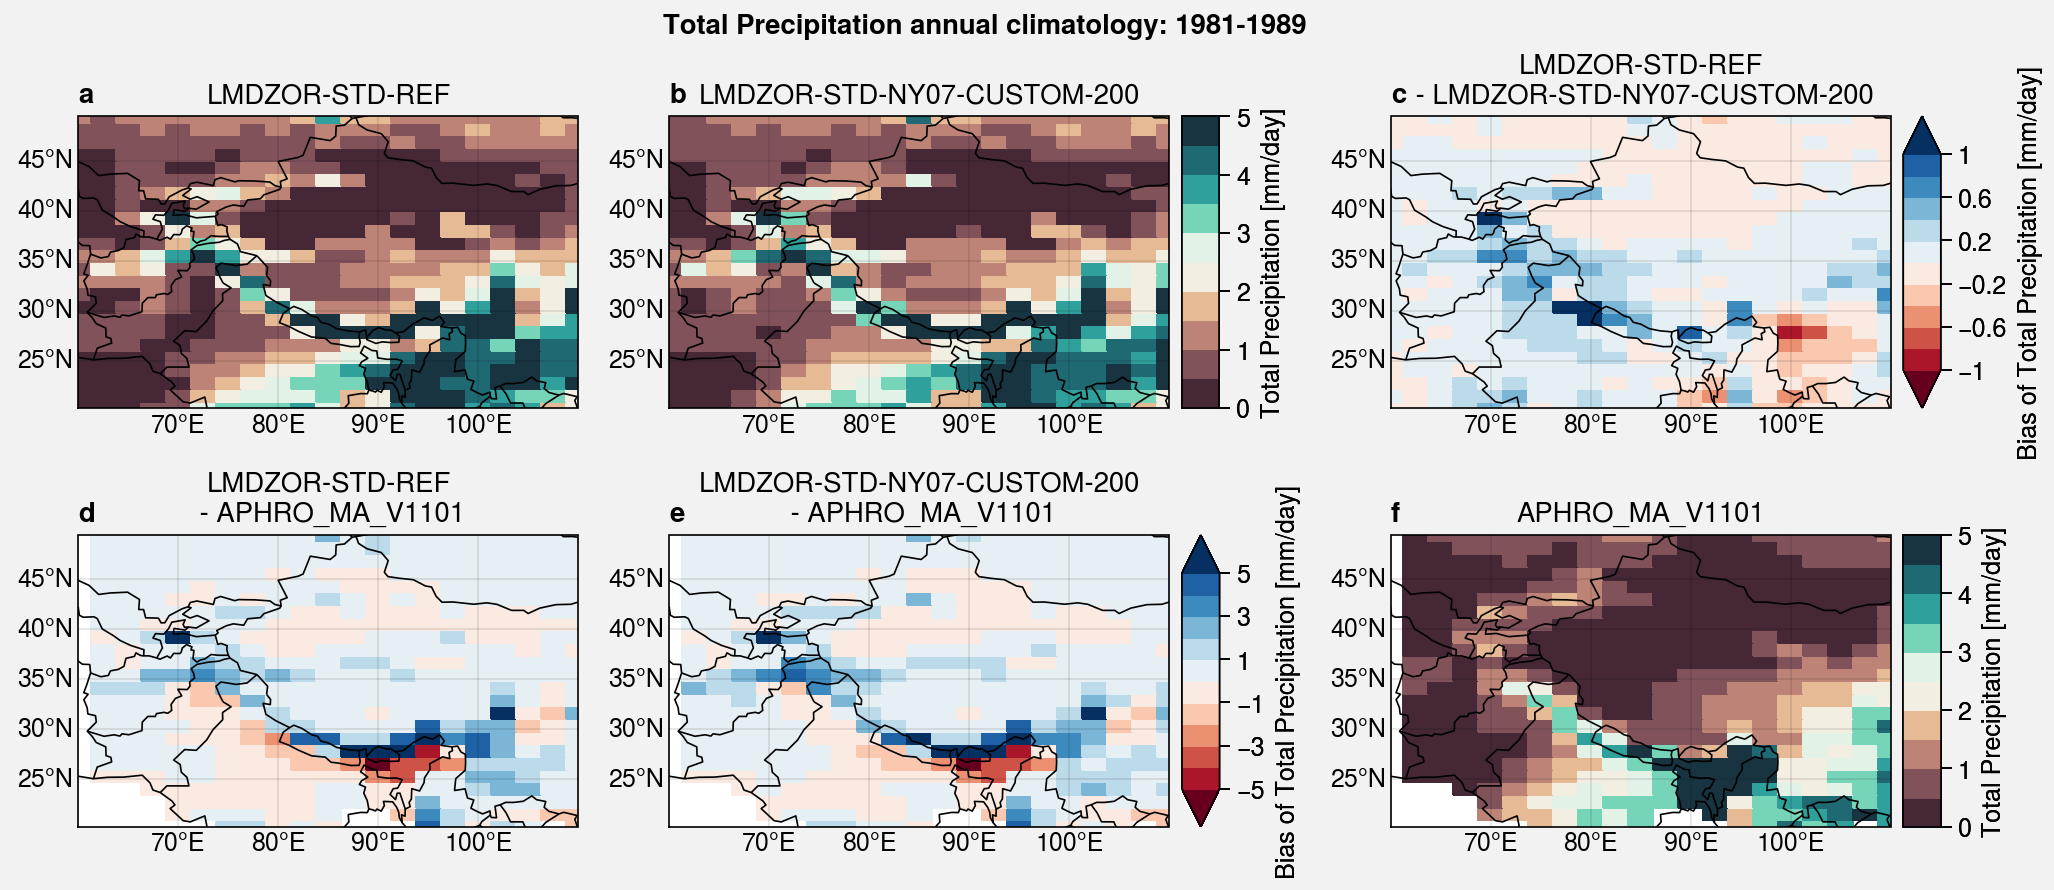

In [30]:
list_vars = ['frac_snow', 't2m', 'precip']
# list_vars = ['precip']
list_var_SRF = ['frac_snow']
list_var_ATM = ['t2m', 'precip']

# Period for climatologies (removing first year spin-up)
period = slice('1981','1989')
latlim, lonlim = u.get_zone('HMA')

for var in list_vars:
    
    print(
        f"""
#############
### Variable: {var} 
#############
        """
    )

    if var in list_var_SRF:
        component = 'SRF'
    elif var in list_var_ATM:
        component = 'ATM'
    else:
        raise ValueError(f"Invalid var argument: '{var}'. Valid names are: 'frac_snow'.")
    
    path = root+exp_ref+'/'+component+'/Analyse/TS_MO/'+exp_ref+'_19800101_19891230_1M_'+var+'.nc'
    print('Open reference simulation:\n'+path+'\n')
    ref = xr.open_dataset(path)[var]
    ref.attrs['title'] = exp_ref

    path = root+exp_new+'/'+component+'/Analyse/TS_MO/'+exp_new+'_19800101_19891230_1M_'+var+'.nc'
    print('Open new simulation:\n'+path+'\n')
    new = xr.open_dataset(path)[var]
    new.attrs['title'] = exp_new
    
    # Rename time dimension and sort latitude from -90 to 90
    ref = ref.rename({'time_counter': 'time'}).sortby('lat')
    new = new.rename({'time_counter': 'time'}).sortby('lat')
        
    # Compute climatolgy
    clim_ref = u.clim(
        ref.sel(time=period, lat=latlim, lon=lonlim), season='annual', calendar='360_day')
    clim_new = u.clim(
        new.sel(time=period, lat=latlim, lon=lonlim), season='annual', calendar='360_day')
    
    # Unit conversion
    if var in ['tas', 'tmp', 't2m']:
        with xr.set_options(keep_attrs=True):
            clim_ref -= 273.15
            clim_new -= 273.15
        clim_ref['units'] = '°C'
        clim_new['units'] = '°C'
    elif var in ['pr', 'precip']:
        with xr.set_options(keep_attrs=True):
            clim_ref *= 86400
            clim_new *= 86400
        clim_ref['units'] = 'mm/day'
        clim_new['units'] = 'mm/day'
    
    # Get observations
    if var in ['snc', 'frac_snow']:
        obs_name = 'NH_SCE_CDR'
        version = 'v01r01'
    elif var in ['tas', 'tmp', 't2m']:
        obs_name = 'CRU_TS'
        version = '4.04'
    elif var in ['pr', 'precip']:
        obs_name = 'APHRO_MA'
        version = 'V1101'
    
    obs = u.get_obs(obs_name, version, var, period=period, machine='CICLAD', regrid=ref)
    clim_obs = u.clim(
        obs.sel(time=period, lat=latlim, lon=lonlim), season='annual', calendar='standard')
    
    # Make plot
    label, units, \
    levels, cmap, extend, \
    levels_diff, cmap_diff, extend_diff, \
    levels_bias, cmap_bias, extend_bias = u.get_var_infos(var)

    u.plot_ref_new_obs(
        var, clim_ref, clim_new, clim_obs, label, units,
        levels, cmap, extend,
        levels_diff, cmap_diff, extend_diff,
        levels_bias, cmap_bias, extend_bias,
        save=False, dpi=300
    )